# Correlation, Bivariate, and Regression Analysis

Rafiq Islam  
2024-12-18

## Introduction

Correlation and regression are two fundamental concepts in statistic,
often used to study relationships between variables. While correlation
measures the strength and direction of a linear relationship between two
variables, regression goes further by modeling the relationship to
predict or explain one variable based on another. This blog explores the
mathematical underpinnings of both concepts, illustrating their
significance in data analysis.

## Correlation

To better explain, we will use the following hypothetical stock data of
10 companies with stock price and their corresponding proportion in the
portfolio.

In [1]:
import pandas as pd

df = pd.DataFrame({
    'Stock': ['Apple', 'Citi', 'MS', 'WF', 'GS', 'Google', 'Amazon', 'Tesla', 'Toyota', 'SPY'],
    'StockPrice': [2.11, 2.42, 2.52, 3.21, 3.62, 3.86, 4.13, 4.27, 4.51, 5.01], 
    'Portfolio': [2.12, 2.16, 2.51, 2.65, 3.62, 3.15, 4.32, 3.31, 4.18, 4.45]
})

df.set_index('Stock', inplace=True)

df.T

The scatterplot of the data looks like this

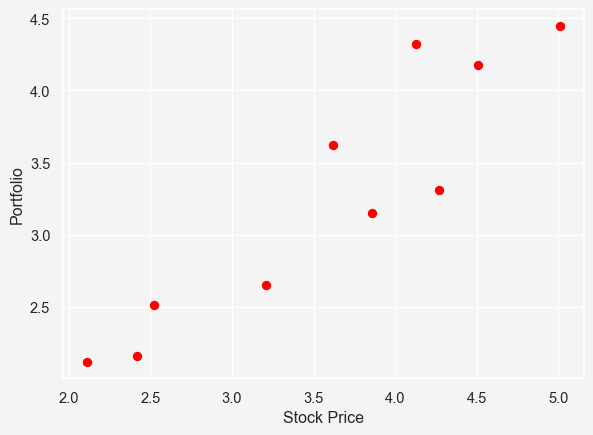

In [2]:
from mywebstyle import plot_style
plot_style('#f4f4f4')
import matplotlib.pyplot as plt
plt.scatter(df.StockPrice, df.Portfolio, color='red')
plt.xlabel('Stock Price')
plt.ylabel('Portfolio')
plt.show()

We can see from the graph that there appears to be a linear relationship
between the $x$ and $y$ values in this case. To find the relationship
mathematically we define the followings

Similarly,

The sample correlation coefficient $r$ is then given as

$$
r = \frac{S_{xy}}{\sqrt{S_{xx}S_{yy}}} = \frac{\sum x_i ^2 - n \bar{x}^2}{\sqrt{\left(\sum x_i ^2 - n \bar{x}^2\right)\left(\sum y_i ^2 - n \bar{y}^2\right)}}
$$

You may have seen a different formula to calculate this quantity which
often looks a bit different

$$
\rho = Corr(X,Y)=\frac{Cov(X,Y)}{\sqrt{var(X)var(Y)}}
$$  
The sample correlation coefficient, $r$, is an estimator of the
population correlation coefficient, $\rho$, in the same way as $\bar{X}$
is an estimator of $\mu$ or $S^2$ is an estimator of $\sigma^2$ . Now
the question is what does this $r$ values mean?

| Value | Meaning |
|-----------------------|--------------------------------------------------|
| $r=1$ | The two variables move together in the same direction in a perfect linear relationship. |
| $0 < r < 1$ | The two variables tend to move together in the same direction but there is NOT a direct relationship. |
| $r= 0$ | The two variables can move in either direction and show no linear relationship. |
| $-1 < r < 0$ | The two variables tend to move together in opposite directions but there is not a direct relationship. |
| $r =-1$ | The two variables move together in opposite directions in a perfect linear relationship. |

Let’s calculate the correlation of our stock data.

In [3]:
import math
x = df.StockPrice.values
y = df.Portfolio.values

n = len(x)

x_sum, y_sum =0,0
s_xx, s_yy, s_xy = 0,0,0
for i in range(n):
    x_sum += x[i]
    s_xx += x[i]**2
    y_sum += y[i]
    s_yy += y[i]**2
    s_xy += x[i]*y[i]    

s_xx = s_xx - (x_sum)**2/n
s_yy = s_yy - (y_sum)**2/n
s_xy = s_xy - (x_sum * y_sum)/n

r = s_xy/math.sqrt(s_xx * s_yy)

# Print with formatted labels
print(f"Sₓₓ: {s_xx:.2f}")
print(f"Sᵧᵧ: {s_yy:.2f}")
print(f"Sₓᵧ: {s_xy:.2f}")
print(' ')
print(f"r : {r:.2f}")

Sₓₓ: 8.53
Sᵧᵧ: 6.97
Sₓᵧ: 7.13
 
r : 0.92

## Bivariate Analysis

The joint probability density function for $X$ and $Y$ in the bivariate
normal distribution is given by:

$$
f_{X,Y}(x, y) = \frac{1}{2\pi \sigma_X \sigma_Y \sqrt{1-\rho^2}} 
\exp\left( -\frac{1}{2(1-\rho^2)} \left[ \frac{(x-\mu_X)^2}{\sigma_X^2} - 2\rho\frac{(x-\mu_X)(y-\mu_Y)}{\sigma_X \sigma_Y} + \frac{(y-\mu_Y)^2}{\sigma_Y^2} \right] \right)
$$

When $|\rho| = 1$, the denominator $\sqrt{1-\rho^2}$ in the PDF becomes
zero, which might appear problematic. However, what happens in this case
is that the joint distribution degenerates into a **one-dimensional
structure** (a line) rather than being a two-dimensional probability
density.

To see why, consider the quadratic term inside the exponential:

$$
Q = \frac{(x-\mu_X)^2}{\sigma_X^2} - 2\rho \frac{(x-\mu_X)(y-\mu_Y)}{\sigma_X \sigma_Y} + \frac{(y-\mu_Y)^2}{\sigma_Y^2}
$$

When $|\rho| = 1$, this quadratic expression simplifies, as shown next.

Start with the simplified $Q$ when $|\rho| = 1$:

This is a **perfect square** because the “cross term” cancels out all
independent variability of $X$ and $Y$ when $|\rho| = 1$.

For the quadratic term $Q$ to have any non-zero probability density
(since it appears in the exponent of the PDF), it must be equal to zero:
$$
\frac{x-\mu_X}{\sigma_X} - \rho \frac{y-\mu_Y}{\sigma_Y} = 0
$$

Rearranging this equation: $$
\frac{y-\mu_Y}{\sigma_Y} = \rho \frac{x-\mu_X}{\sigma_X}
$$

Multiply through by $\sigma_Y$: $$
y - \mu_Y = \rho \frac{\sigma_Y}{\sigma_X} (x - \mu_X)
$$

Thus: $$
y = \mu_Y + \rho \frac{\sigma_Y}{\sigma_X} (x - \mu_X)
$$

This is the equation of a straight line in the $(X, Y)$-plane. The slope
of the line is $\rho \frac{\sigma_Y}{\sigma_X}$, and the line passes
through the point $(\mu_X, \mu_Y)$. When $|\rho| = 1$, all the joint
probability mass collapses onto this line, meaning $X$ and $Y$ are
perfectly linearly dependent.

```` numberLines
```{ojs}
// Import necessary libraries
Plot = require('@observablehq/plot')
d3 = require('d3@7')

// Define the bivariate normal PDF function
function bivariateNormalPDF(x, y, muX, muY, sigmaX, sigmaY, rho) {
  const z =
    ((x - muX) ** 2) / sigmaX ** 2 -
    (2 * rho * (x - muX) * (y - muY)) / (sigmaX * sigmaY) +
    ((y - muY) ** 2) / sigmaY ** 2;
  const denominator = 2 * Math.PI * sigmaX * sigmaY * Math.sqrt(1 - rho ** 2);
  return Math.exp(-z / (2 * (1 - rho ** 2))) / denominator;
}

// Parameters
const muX = 0,
  muY = 0,
  sigmaX = 1,
  sigmaY = 1;

// Create a slider for rho
viewof rho = Inputs.range([-0.99, 0.99], { step: 0.01, value: 0, label: 'Correlation (ρ)' })

// Generate grid data
const x = d3.range(-3, 3.1, 0.1);
const y = d3.range(-3, 3.1, 0.1);
const grid = x.flatMap((xi) => y.map((yi) => ({ x: xi, y: yi, z: bivariateNormalPDF(xi, yi, muX, muY, sigmaX, sigmaY, rho) })));

// Create the contour plot
Plot.plot({
  marks: [
    Plot.contour(grid, {
      x: 'x',
      y: 'y',
      z: 'z',
      stroke: 'steelblue',
      strokeWidth: 1,
      thresholds: 10,
    }),
  ],
  x: {
    label: 'X',
  },
  y: {
    label: 'Y',
  },
  color: {
    legend: true,
    label: 'Density',
  },
  width: 600,
  height: 600,
})
```
````

> **OJS Syntax Error (line 15, column 1)Unexpected token**